In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
data = pd.read_csv('df_without_covid_clean.csv')

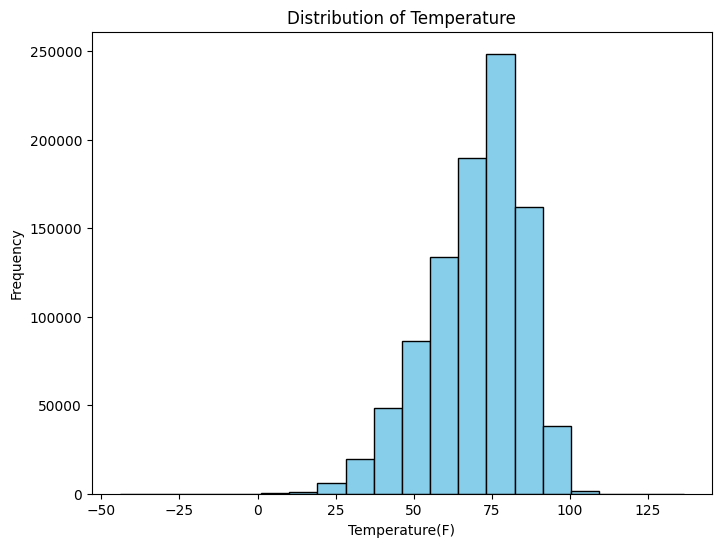

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(data['Temperature(F)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Temperature(F)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.show()

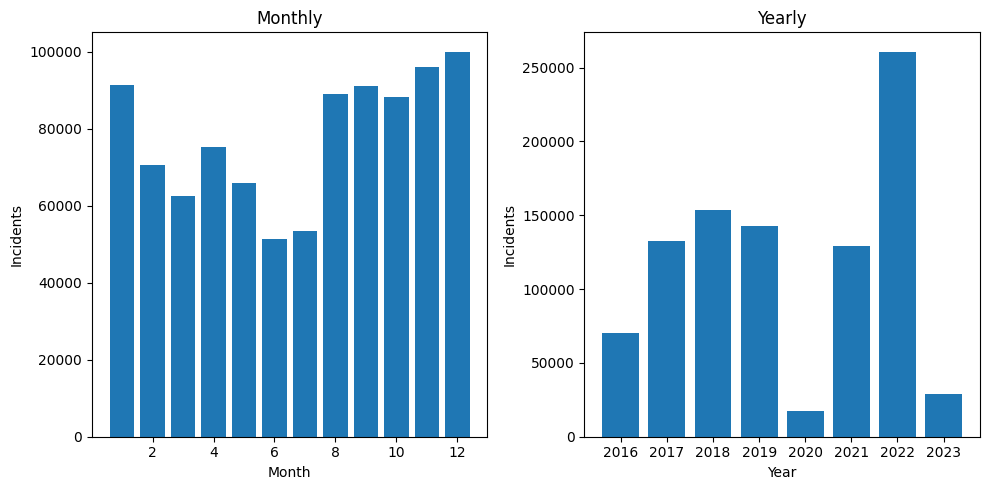

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data['Start_Date'] = pd.to_datetime(data['Start_Time'])
data['month'] = data['Start_Date'].dt.month
data['year'] = data['Start_Date'].dt.year 

monthly_counts = data.groupby('month').count()['ID'].reset_index()
yearly_counts = data.groupby('year').count()['ID'].reset_index()

# Create subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Monthly bar plot
ax1.bar(monthly_counts['month'], monthly_counts['ID'])  
ax1.set_xlabel('Month')
ax1.set_ylabel('Incidents')
ax1.set_title('Monthly')

# Yearly bar plot
ax2.bar(yearly_counts['year'], yearly_counts['ID'])
ax2.set_xlabel('Year')
ax2.set_ylabel('Incidents')
ax2.set_title('Yearly')

fig.tight_layout()
plt.show()

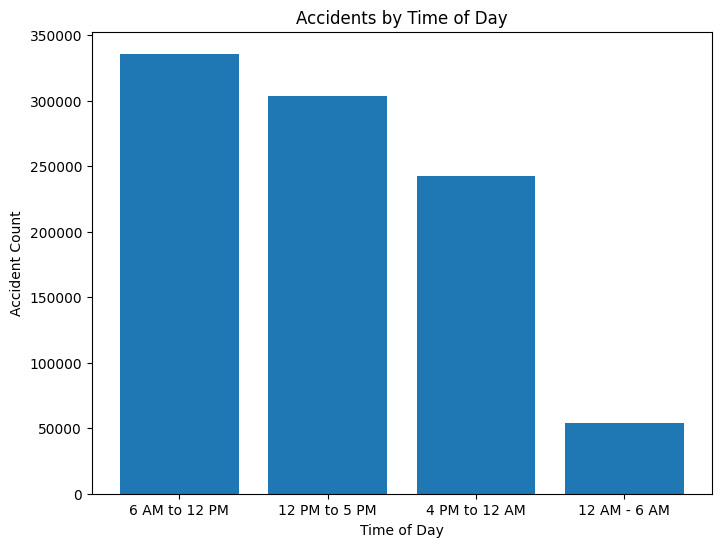

Accident Counts by Time of Day:
Time_of_Day
6 AM to 12 PM    335724
12 PM to 5 PM    303304
4 PM to 12 AM    242385
12 AM - 6 AM      53755
Name: count, dtype: int64


In [18]:
# Create a new column 'Time_of_Day' based on the provided labels
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
time_bins = [0, 6, 12, 17, 24]  # Adjusted bin edges
labels = ['12 AM - 6 AM', '6 AM to 12 PM', '12 PM to 5 PM', '4 PM to 12 AM']
data['Time_of_Day'] = pd.cut(data['Start_Time'].dt.hour, bins=time_bins, labels=labels, right=False)

# Count the frequencies of accidents by time of day
time_of_day_counts = data['Time_of_Day'].value_counts()

# Create a bar plot to visualize the distribution
plt.figure(figsize=(8, 6))
plt.bar(time_of_day_counts.index, time_of_day_counts.values)
plt.xlabel('Time of Day')
plt.ylabel('Accident Count')
plt.title('Accidents by Time of Day')
plt.show()

# Display the accident counts for each time label
print("Accident Counts by Time of Day:")
print(time_of_day_counts)

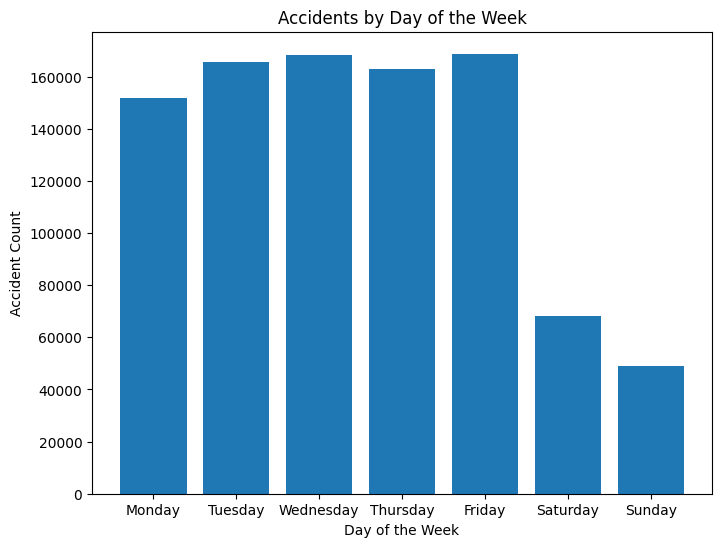

In [19]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
day_of_week_counts = data['Start_Time'].dt.day_name().value_counts()
plt.figure(figsize=(8, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_counts = day_of_week_counts.reindex(day_order)
plt.bar(day_of_week_counts.index, day_of_week_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Accident Count')
plt.title('Accidents by Day of the Week')
plt.show()

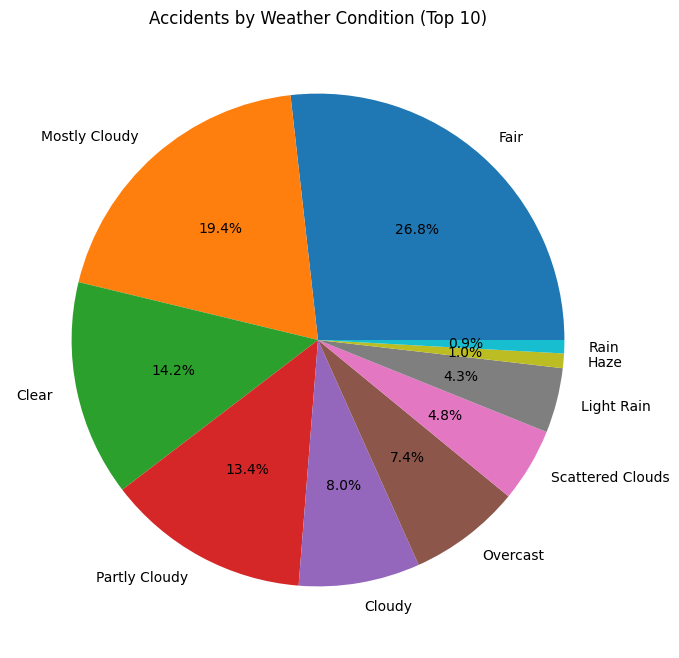

In [20]:
weather_counts = data['Weather_Condition'].value_counts().head(10)  # Top 10 weather conditions
plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%')
plt.title('Accidents by Weather Condition (Top 10)')
plt.show()

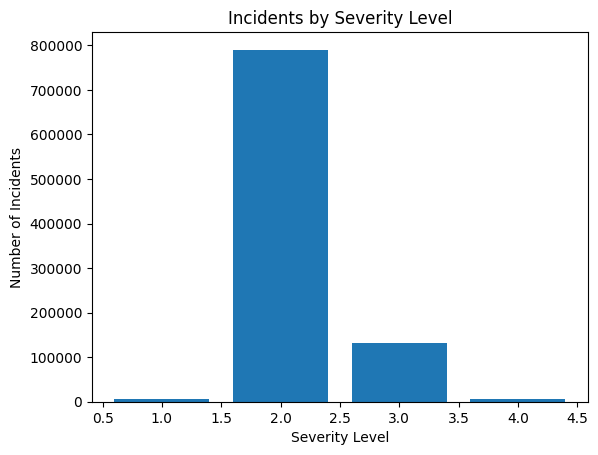

In [21]:

severity_counts = data['Severity'].value_counts().sort_index()

plt.bar(severity_counts.index, severity_counts.values)
plt.xlabel('Severity Level')
plt.ylabel('Number of Incidents')
plt.title('Incidents by Severity Level')
plt.show()

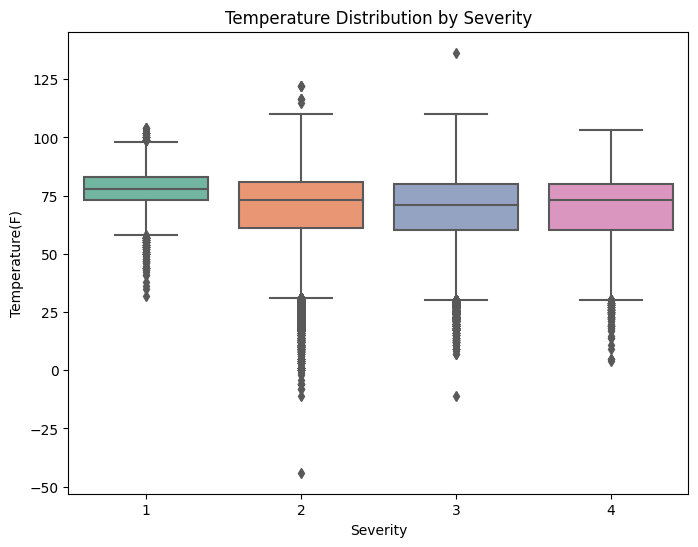

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Severity', y='Temperature(F)', data=data, palette='Set2')
plt.xlabel('Severity')
plt.ylabel('Temperature(F)')
plt.title('Temperature Distribution by Severity')
plt.show()

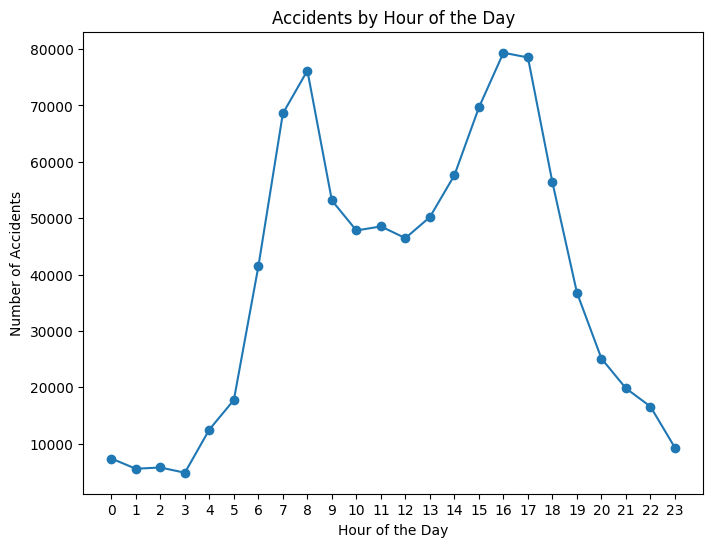

In [24]:

data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['Hour'] = data['Start_Time'].dt.hour
hourly_counts = data['Hour'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Hour of the Day')
plt.xticks(hourly_counts.index)
plt.show()


C:\Users\deepa.DEEPAK\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


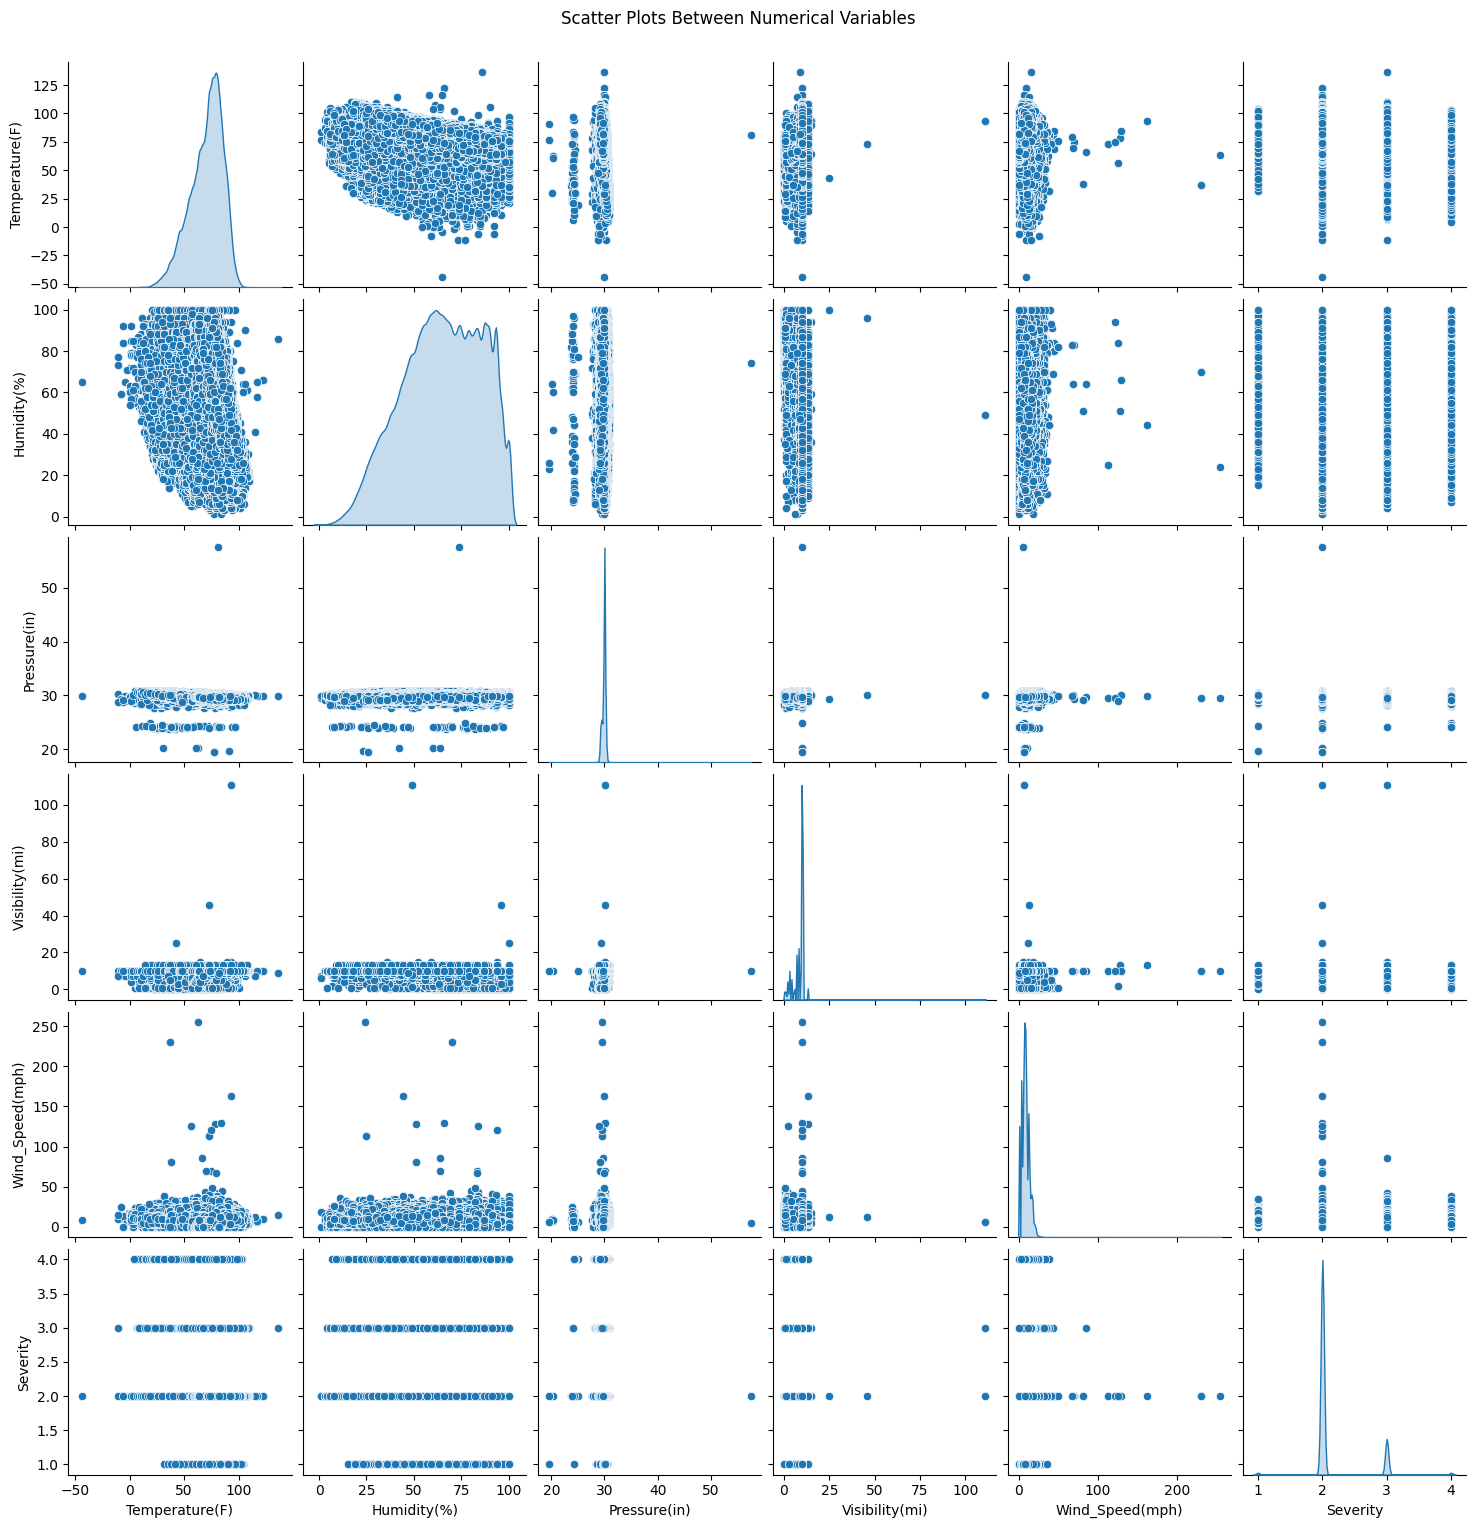

In [25]:
sns.pairplot(data, vars=['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)','Severity'], diag_kind='kde')
plt.suptitle('Scatter Plots Between Numerical Variables', y=1.02)
plt.show()